## The Titanic Disaster

(a) Join the Titanic: Machine Learning From Disaster competition on Kaggle. Download the training and test data.


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')
tt_train = train
tt_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## Data Visualization & Analysis

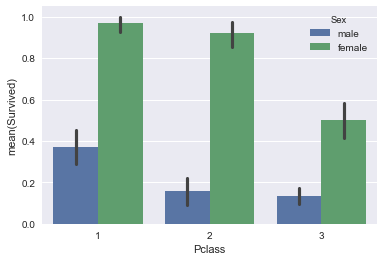

In [5]:
#Data Visualization
sns.barplot(x = "Pclass" , y ='Survived', hue = 'Sex', data = tt_train)

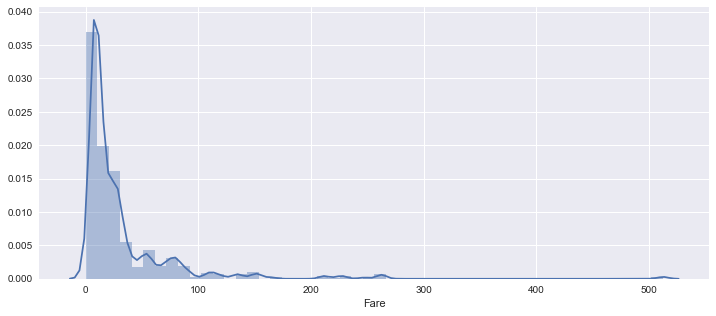

In [6]:
#Age
plt.figure(figsize = (12,5))
survivals = tt_train[tt_train['Survived'] == 1]
dead = tt_train[tt_train['Survived'] == 0]
sns.distplot(tt_train['Fare'].dropna())
#sns.distplot(survivals['Age'].dropna())
sns.plt.show()

In [7]:
def survive_rate(df, col, fillna = True): 
    sub = df
    if fillna: 
        sub[col].fillna('N/a', inplace = True)
    ctgry = sub[col].unique()
    for c in ctgry:
        df_sub = df[df[col] == c]
        print('The survival rate of ', c, ' is ',df_sub['Survived'].sum()/len(df_sub),
              '    ( data size:', len(df_sub), ')')
    return
survive_rate(tt_train, 'Embarked')    

The survival rate of  S  is  0.33695652173913043     ( data size: 644 )
The survival rate of  C  is  0.5535714285714286     ( data size: 168 )
The survival rate of  Q  is  0.38961038961038963     ( data size: 77 )
The survival rate of  N/a  is  1.0     ( data size: 2 )


In [8]:
survive_rate(tt_train, 'Pclass')

The survival rate of  3  is  0.24236252545824846     ( data size: 491 )
The survival rate of  1  is  0.6296296296296297     ( data size: 216 )
The survival rate of  2  is  0.47282608695652173     ( data size: 184 )


In [9]:
survive_rate(tt_train, 'Sex')

The survival rate of  male  is  0.18890814558058924     ( data size: 577 )
The survival rate of  female  is  0.7420382165605095     ( data size: 314 )


In [10]:
survive_rate(tt_train, 'SibSp')

The survival rate of  1  is  0.5358851674641149     ( data size: 209 )
The survival rate of  0  is  0.34539473684210525     ( data size: 608 )
The survival rate of  3  is  0.25     ( data size: 16 )
The survival rate of  4  is  0.16666666666666666     ( data size: 18 )
The survival rate of  2  is  0.4642857142857143     ( data size: 28 )
The survival rate of  5  is  0.0     ( data size: 5 )
The survival rate of  8  is  0.0     ( data size: 7 )


In [11]:
survive_rate(tt_train, 'Parch')

The survival rate of  0  is  0.34365781710914456     ( data size: 678 )
The survival rate of  1  is  0.5508474576271186     ( data size: 118 )
The survival rate of  2  is  0.5     ( data size: 80 )
The survival rate of  5  is  0.2     ( data size: 5 )
The survival rate of  3  is  0.6     ( data size: 5 )
The survival rate of  4  is  0.0     ( data size: 4 )
The survival rate of  6  is  0.0     ( data size: 1 )


In [12]:
#transforming features
def Age(df):
    df.Age.fillna(-0.5, inplace = True)
    bins = [-1, 0, 4, 12, 18, 25, 35, 55, 120]
    names = ['Na', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elder Adult', 'Senior']
    ctgry = pd.cut(df.Age, bins, labels = names)
    df.Age = ctgry
    return df

def Fare(df):
    df.Fare.fillna(-0.5, inplace = True)
    bins = [-1, 0, 10, 50, 100, 180, 300, 600]
    names = ['na','6th Class', '5th Class', '4th Class', '3rd Class', '2nd Class', '1st Class']
    ctgry = pd.cut(df.Fare, bins, labels = names)
    df.Fare = ctgry
    return df

def Cabin(df):
    df.Cabin.fillna('N/a', inplace = True)
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df
    
def Name(df):
    df['Last Name'] = df.Name.apply(lambda x: x.split(' ')[0][:-1])
    df['Prefix'] = df.Name.apply(lambda x: x.split(' ')[1][:-1])
    return

def Dropfeature(df):
    features = ['Name','Ticket']
    df.drop(features, axis = 1, inplace = True)
    return df

def feature_trsfm(df):
    Cabin(df)
    Fare(df)
    Age(df)
    Name(df)
    Dropfeature(df)
    df.Embarked.fillna('N/a', inplace = True)
    return df

In [13]:
train1 = feature_trsfm(tt_train)
train1.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Last Name,Prefix
0,1,0,3,male,Young Adult,1,0,6th Class,N,S,Braund,Mr
1,2,1,1,female,Elder Adult,1,0,4th Class,C,C,Cumings,Mrs
2,3,1,3,female,Adult,0,0,6th Class,N,S,Heikkinen,Miss
3,4,1,1,female,Adult,1,0,4th Class,C,S,Futrelle,Mrs
4,5,0,3,male,Adult,0,0,6th Class,N,S,Allen,Mr


In [14]:
survive_rate(train1, 'Cabin', fillna = False)

The survival rate of  N  is  0.29985443959243085     ( data size: 687 )
The survival rate of  C  is  0.5932203389830508     ( data size: 59 )
The survival rate of  E  is  0.75     ( data size: 32 )
The survival rate of  G  is  0.5     ( data size: 4 )
The survival rate of  D  is  0.7575757575757576     ( data size: 33 )
The survival rate of  A  is  0.4666666666666667     ( data size: 15 )
The survival rate of  B  is  0.7446808510638298     ( data size: 47 )
The survival rate of  F  is  0.6153846153846154     ( data size: 13 )
The survival rate of  T  is  0.0     ( data size: 1 )


In [15]:
survive_rate(train1, 'Fare', fillna = False)

The survival rate of  6th Class  is  0.205607476635514     ( data size: 321 )
The survival rate of  4th Class  is  0.6542056074766355     ( data size: 107 )
The survival rate of  5th Class  is  0.42025316455696204     ( data size: 395 )
The survival rate of  2nd Class  is  0.6470588235294118     ( data size: 17 )
The survival rate of  3rd Class  is  0.7575757575757576     ( data size: 33 )
The survival rate of  na  is  0.06666666666666667     ( data size: 15 )
The survival rate of  1st Class  is  1.0     ( data size: 3 )


In [16]:
survive_rate(train1, 'Age', fillna = False)

The survival rate of  Young Adult  is  0.3333333333333333     ( data size: 162 )
The survival rate of  Elder Adult  is  0.4011299435028249     ( data size: 177 )
The survival rate of  Adult  is  0.42346938775510207     ( data size: 196 )
The survival rate of  Na  is  0.2937853107344633     ( data size: 177 )
The survival rate of  Baby  is  0.675     ( data size: 40 )
The survival rate of  Teenager  is  0.42857142857142855     ( data size: 70 )
The survival rate of  Senior  is  0.3     ( data size: 40 )
The survival rate of  Child  is  0.4482758620689655     ( data size: 29 )


From the data visualization and analysis, we can see Cabin has a lot of missing data so we will not use it for logistic regression

## Data Transfromation

(b) Using logistic regression, try to predict whether a passenger survived the disaster. You can choose the features (or combinations of features) you would like to use or ignore, provided you justify your reasoning.

In [33]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [127]:
def Name(df):
    df['Last Name'] = df.Name.apply(lambda x: x.split(' ')[0][:-1])
    df['Prefix'] = df.Name.apply(lambda x: x.split(' ')[1][:-1])
    return

def Dropfeature(df):
    features = ['Name','Ticket','Cabin']
    df.drop(features, axis = 1, inplace = True)
    return 

def Sex(df):
    df.Sex.replace({'male': 0,
                    'female': 1},
                    inplace = True)
    return 

def Embarked(df):
    df.Embarked.replace({'S': 1,
                         'C': 2,
                         'Q': 3,},
                         inplace = True)
    df.Embarked.fillna('0', inplace = True)
    return

def Age(df):
    df.Age.fillna(train.Age.mean(), inplace = True)
    return

def Fare(df):
    df.Fare.fillna(train.Fare.mean(), inplace = True)

def transform(df):
    Age(df)
    Name(df)
    Dropfeature(df)
    Sex(df)
    Embarked(df)
    Fare(df)
    return
transform(train)

In [82]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Last Name,Prefix
0,1,0,3,0,22.000000,1,0,7.2500,1,Braund,Mr
1,2,1,1,1,38.000000,1,0,71.2833,2,Cumings,Mrs
2,3,1,3,1,26.000000,0,0,7.9250,1,Heikkinen,Miss
3,4,1,1,1,35.000000,1,0,53.1000,1,Futrelle,Mrs
4,5,0,3,0,35.000000,0,0,8.0500,1,Allen,Mr
5,6,0,3,0,29.699118,0,0,8.4583,3,Moran,Mr
6,7,0,1,0,54.000000,0,0,51.8625,1,McCarthy,Mr
7,8,0,3,0,2.000000,3,1,21.0750,1,Palsson,Master
8,9,1,3,1,27.000000,0,2,11.1333,1,Johnson,Mrs
9,10,1,2,1,14.000000,1,0,30.0708,2,Nasser,Mrs


In [84]:
train_x = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_y = train[['Survived']]

In [94]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression()
lr.fit(train_x, train_y.values.reshape(len(train_y),))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(c) Train your classifier using all of the training data, and test it using the testing data. Submit your results to Kaggle.

In [129]:
transform(test)

In [130]:
test_x = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [135]:
prediction = lr.predict(test_x)

In [136]:
result = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})

In [138]:
result.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [139]:
result.to_csv('Titanic_prediction.csv', index = False)